In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [21]:
data = pd.read_csv('iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [23]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [27]:
data.describe(include = 'object')

,Species
count,150
unique,3
top,Iris-setosa
freq,50


In [29]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [31]:
print("1. Sepal length :", data['SepalLengthCm'].dtype)
print("2. Sepal width :", data['SepalWidthCm'].dtype)
print("3. Petal length :", data['PetalLengthCm'].dtype)
print("4. Petal width :", data['PetalWidthCm'].dtype)
print("5. Species :", data['Species'].dtype)

1. Sepal length : float64
2. Sepal width : float64
3. Petal length : float64
4. Petal width : float64
5. Species : object


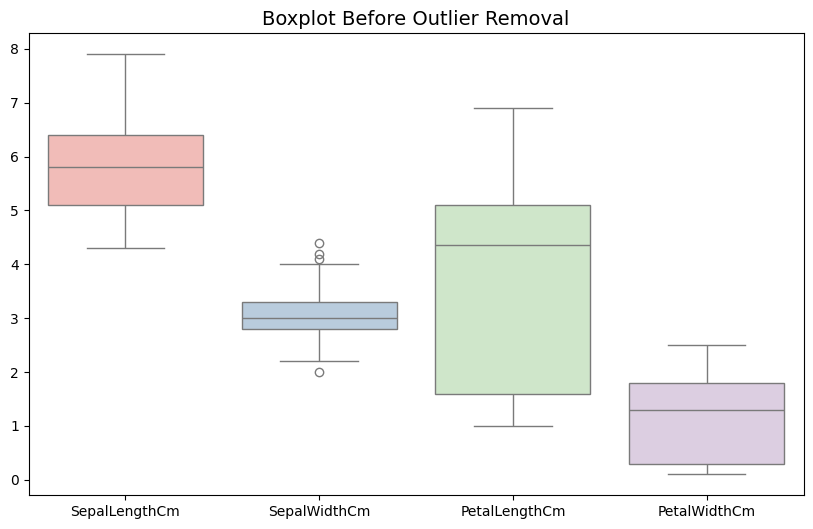


Original Shape: (150, 6)
After Outlier Removal: (146, 6)


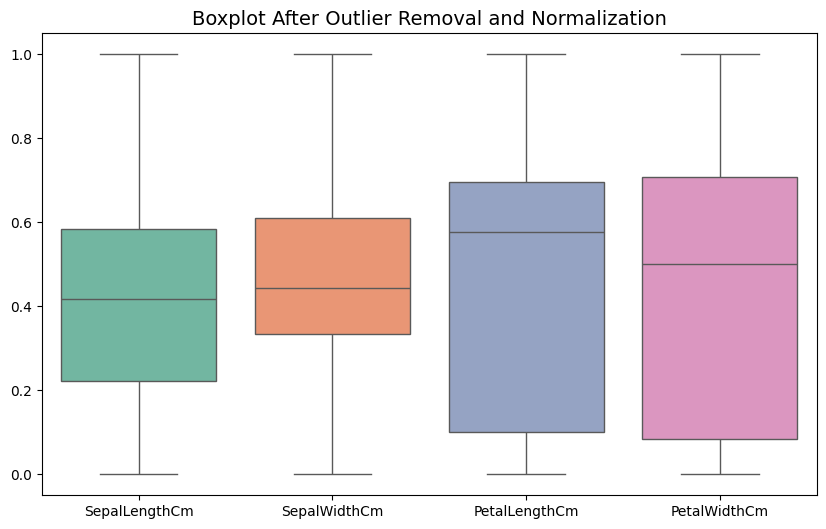

In [33]:
# Boxplot before outlier removal
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[num_cols], palette="Pastel1")
plt.title("Boxplot Before Outlier Removal", fontsize=14)
plt.show()

# Outlier removal using IQR
Q1 = data[num_cols].quantile(0.25)
Q3 = data[num_cols].quantile(0.75)
IQR = Q3 - Q1
condition = ~((data[num_cols] < (Q1 - 1.5 * IQR)) | (data[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
data_cleaned = data[condition].reset_index(drop=True)

print(f"\nOriginal Shape: {data.shape}")
print(f"After Outlier Removal: {data_cleaned.shape}")

# Normalize the cleaned data
scaler = MinMaxScaler()
data_scaled = data_cleaned.copy()
data_scaled[num_cols] = scaler.fit_transform(data_cleaned[num_cols])

# Boxplot after cleaning + normalization
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_scaled[num_cols], palette="Set2")
plt.title("Boxplot After Outlier Removal and Normalization", fontsize=14)
plt.show()


<Axes: xlabel='SepalLengthCm', ylabel='Count'>

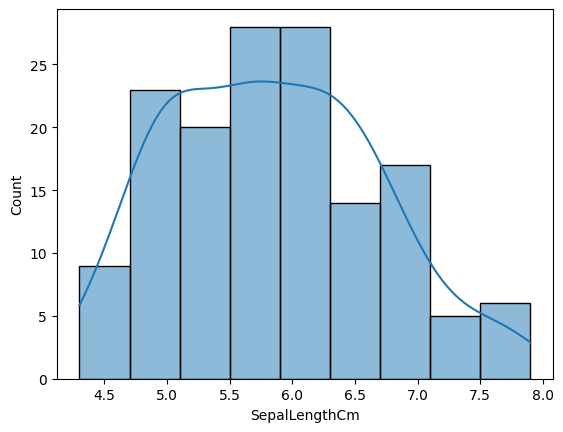

In [37]:
sns.histplot(x = data['SepalLengthCm'], kde=True)

<Axes: xlabel='SepalWidthCm', ylabel='Count'>

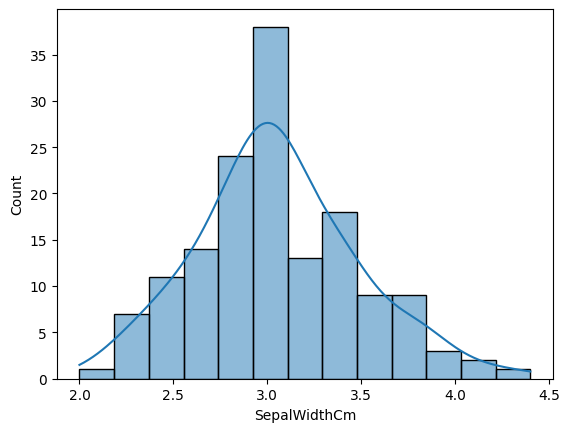

In [41]:
sns.histplot(x = data['SepalWidthCm'], kde=True)

<Axes: xlabel='PetalLengthCm', ylabel='Count'>

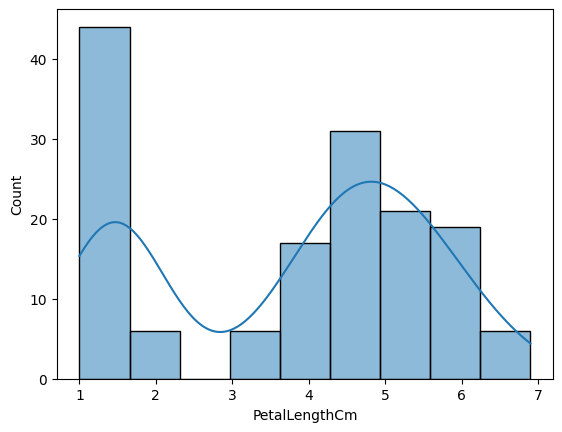

In [43]:
sns.histplot(x = data['PetalLengthCm'], kde=True)

<Axes: xlabel='PetalWidthCm', ylabel='Count'>

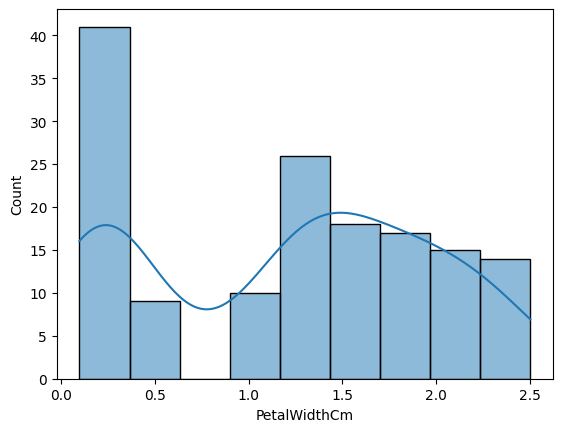

In [45]:
sns.histplot(x = data['PetalWidthCm'], kde=True)

<Axes: ylabel='SepalLengthCm'>

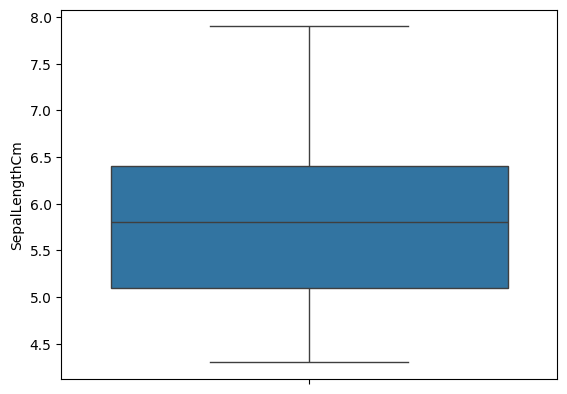

In [53]:
sns.boxplot(data['SepalLengthCm'])

<Axes: ylabel='SepalWidthCm'>

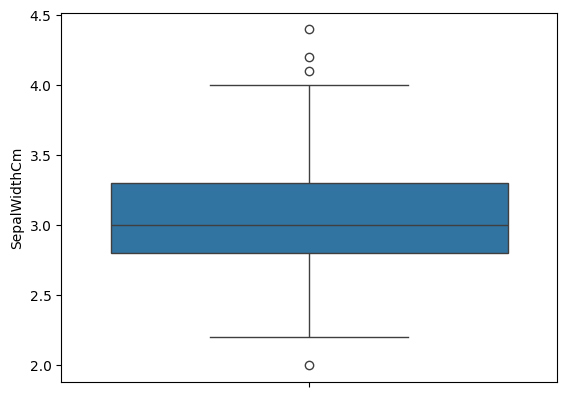

In [55]:
sns.boxplot(data['SepalWidthCm'])

<Axes: ylabel='PetalLengthCm'>

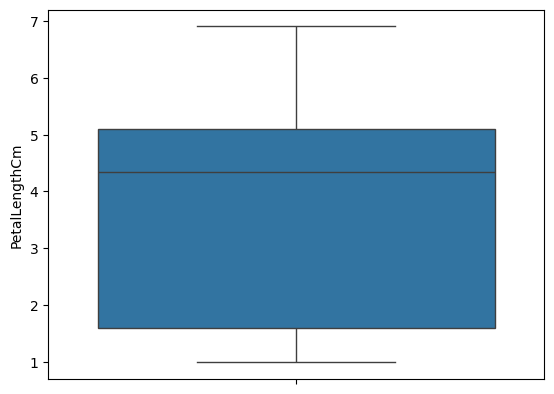

In [57]:
sns.boxplot(data['PetalLengthCm'])

<Axes: ylabel='PetalWidthCm'>

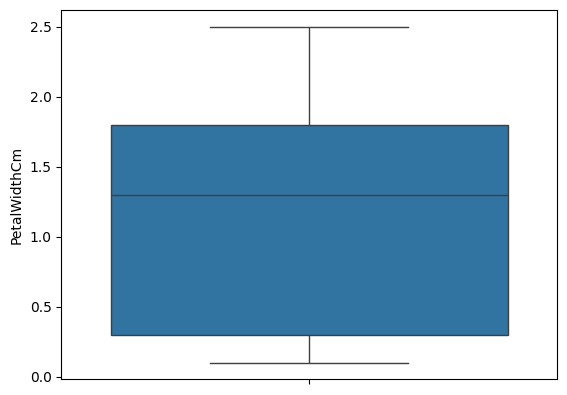

In [59]:
sns.boxplot(data['PetalWidthCm'])

In [61]:
sns.boxplot(x='SepalLengthCm',y='species',data=data)

ValueError: Could not interpret value `species` for `y`. An entry with this name does not appear in `data`.